<a href="https://colab.research.google.com/github/Priyankamishra2098/regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

**Business Context:**
Yes Bank, a prominent player in the Indian financial sector, has faced significant challenges since the revelation of the fraud case involving its former CEO, Rana Kapoor, starting in 2018. This project aims to explore the impact of this high-profile scandal on Yes Bank's stock prices. The focus is on understanding whether predictive models, particularly time series models, can effectively capture and predict stock movements in the aftermath of such corporate controversies.


**Data Overview:**
The dataset encompasses monthly stock prices of Yes Bank from its inception, providing a comprehensive view of the bank's stock performance. Key features include closing, opening, highest, and lowest stock prices for each month.


**Objective:**
The primary goal is to develop a robust predictive model that can forecast the closing price of Yes Bank's stock for a given month. This involves leveraging machine learning regression techniques, specifically tailored to the dynamics of time series data.


**Approach:**

**1. Data Exploration:**

Analyze historical stock prices to identify patterns, trends, and anomalies.
Investigate the impact of the Rana Kapoor fraud case on stock movements.

**2. Feature Engineering:**

Enhance the dataset with relevant features, such as calculated returns, moving averages, and other financial indicators.

**3. Model Selection:**

Choose appropriate regression models for time series forecasting, considering machine learning models like Random Forest Regression or Gradient Boosting.

**4. Training and Testing:**

Split the dataset into training and testing sets, ensuring a robust evaluation of the model's performance.

**5. Evaluation Metrics:**

Employ metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and others to assess the accuracy of the predictive models.

**6. Impact Analysis:**

Examine how well the model captures the stock price variations and if it can reflect the market sentiment surrounding the fraud case.

**7. Communication:**

Present findings and insights in a clear and concise manner, emphasizing the model's predictive capabilities and limitations.

Outcome:
The project aims to provide valuable insights into the predictability of Yes Bank's stock closing prices, especially in the context of a high-profile corporate scandal. This analysis can aid investors, financial analysts, and stakeholders in making informed decisions in a dynamic market environment.








# **GitHub Link -**

https://github.com/Priyankamishra2098/regression/blob/main/Regression.ipynb


# **Problem Statement**


**Amidst the aftermath of the Rana Kapoor fraud case at Yes Bank, the challenge is to assess the impact on stock prices and develop effective machine learning regression models. The goal is to predict monthly closing prices, evaluating the suitability of time series models and exploring features for enhanced accuracy. By addressing these challenges, the project aims to provide actionable insights for investors, financial analysts, and decision-makers in navigating the dynamic landscape of Yes Bank's stock in the post-scandal period.**

## **1.Importing Libraries and Dataset**

### Importing Libraries

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNetCV)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

print("Libraries imported sucessfully")


Libraries imported sucessfully


### Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_yes = "/content/drive/MyDrive/data_YesBank_StockPrices.csv"
print("Dataset loaded sucessfully")

Dataset loaded sucessfully


### Reading of Dataset

In [ ]:
df = pd.read_csv(data_yes)
print("Dataset Read Sucessfully")

Dataset Read Sucessfully


###Dimensions of Dataset

In [ ]:
print(df.shape)

(185, 5)


### Dataset First View

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


###Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)


Duplicate Value Count: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


### What did you know about your dataset?

**Dimensions**: The dataset has 185 rows and 5 columns.

**Columns:**
Date: Represents the month and year in a string format.
Open: Opening stock price for the month (float64).
High: Highest stock price during the month (float64).
Low: Lowest stock price during the month (float64).
Close: Closing stock price for the month (float64).

**Date Range:** The dataset spans from July 2005 (earliest record) to November 2020 (latest record).

**Data Types:** The 'Date' column is of type 'object', while the numerical columns are of type 'float64'.

**Non-null Counts:**There are no missing values in any of the columns.

## **2.Understanding the Variables**

In [ ]:
# Dataset Columns

columns_list = df.columns.tolist()

# Print the list of columns
print("Dataset Columns:", columns_list)


Dataset Columns: ['Date', 'Open', 'High', 'Low', 'Close']


In [ ]:
#dataset describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

**1. Date:** Represents the month and year in a string format.

**2. Open:** Opening stock price for the month (float64).

**3. High:**Highest stock price during the month (float64).

**4. Low:** Lowest stock price during the month (float64).

**5. Close:** Closing stock price for the month (float64).

### Unique Values for each variable

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for Date: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14'

## 3. ***Data Wrangling***

In [ ]:
ybc_df = df.copy()

In [ ]:
ybc_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
ybc_df['Date'] = pd.to_datetime(ybc_df['Date'].apply(lambda x:datetime.strptime(x, '%b-%y')))

In [ ]:
ybc_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

There are no missing and duplicate values in the dataset. Thus, did no manipulations Used. pandas to convert a column named 'Date' in a DataFrame to datetime format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Univariate Analysis

#### Chart - 1 : Distribution plot  for the 'Close' prices

<Axes: xlabel='Close', ylabel='Density'>

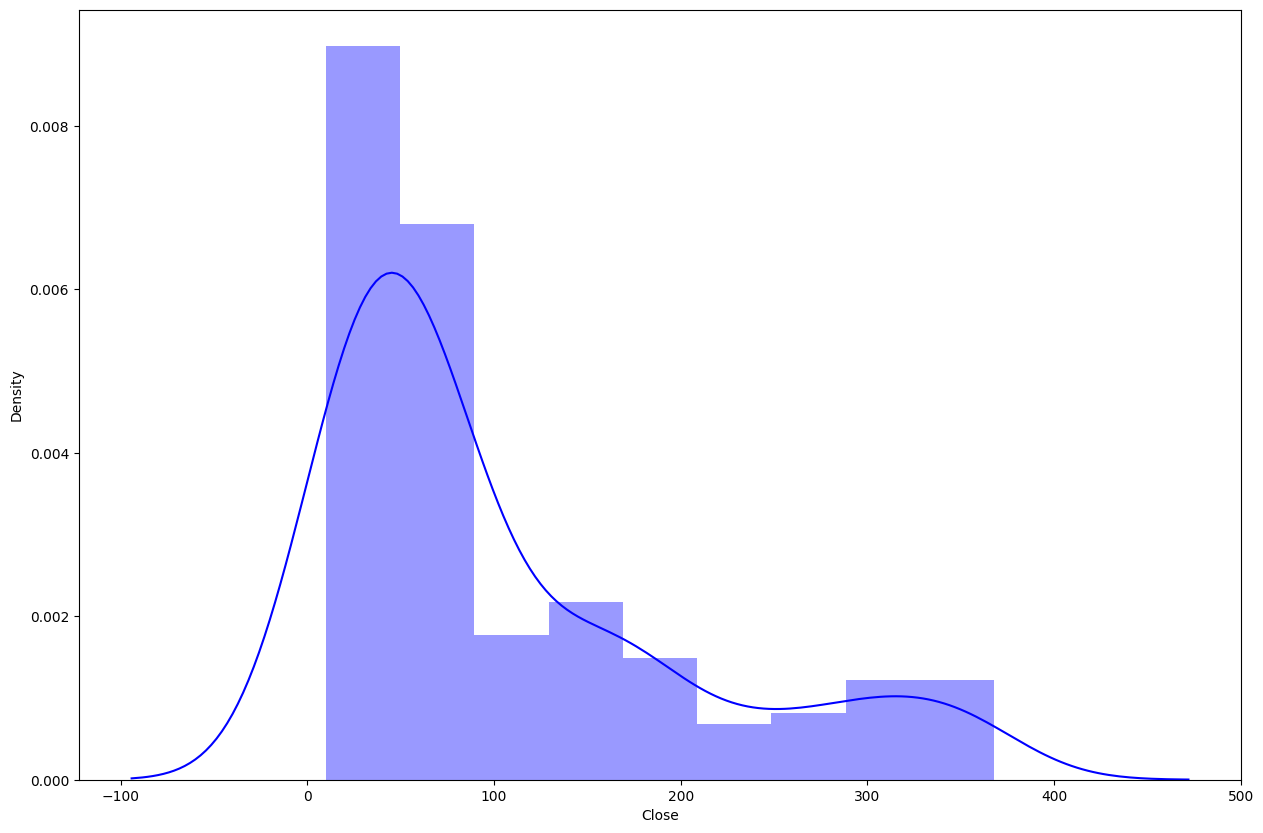

In [ ]:
# Chart - 1 visualization code
# Dependent Variable 'Price'
plt.figure(figsize = (15,10))
sns.distplot(ybc_df['Close'], color = "blue")

##### 1. Why did you pick the specific chart?

Choosing a distribution plot (histogram) for visualizing the distribution of the 'Close' prices has several advantages:

1. Understanding the Data Distribution
2. Identifying Patterns
3. Outlier Detection
4. Bin Selection
5. Data Exploration
6. Visualization of Trends Over Time
7. Ease of Interpretation

It provides a quick and intuitive overview of the data's central tendency, spread, and potential outliers. It's especially useful for initial data exploration and identifying patterns in the data.







##### 2. What is/are the insight(s) found from the chart?

As per the Chart 1 'Close' column data is positively skewed. In other words, the majority of the data points cluster towards the left, and there are relatively fewer data points with higher values.

So to deal with it I need to apply a logarithmic transformation to the data can help reduce right skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from these visualizations can certainly contribute to positive business impact.  Identifying skewed distributions might prompt further investigation into the causes, and addressing these issues could lead to more accurate predictions or improved decision-making.

#### Chart - 2 : Visualizing numeric features with histograms

In [ ]:
numeric_features = ybc_df.select_dtypes(include=['number']).columns.tolist()
print(numeric_features)


['Open', 'High', 'Low', 'Close']


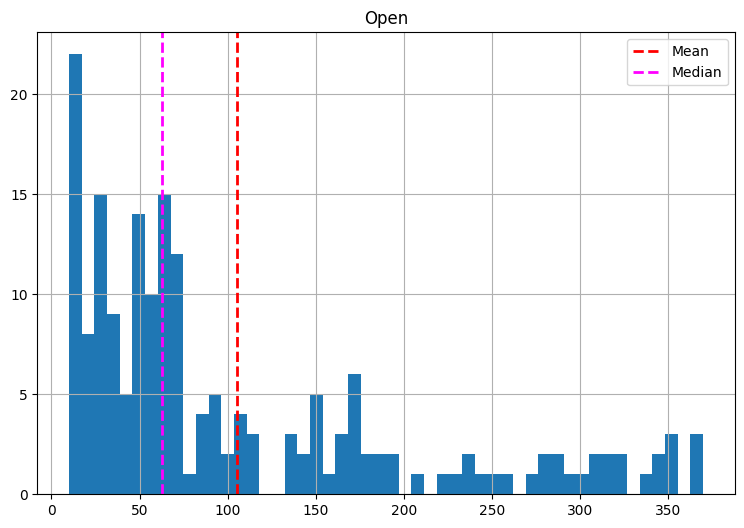

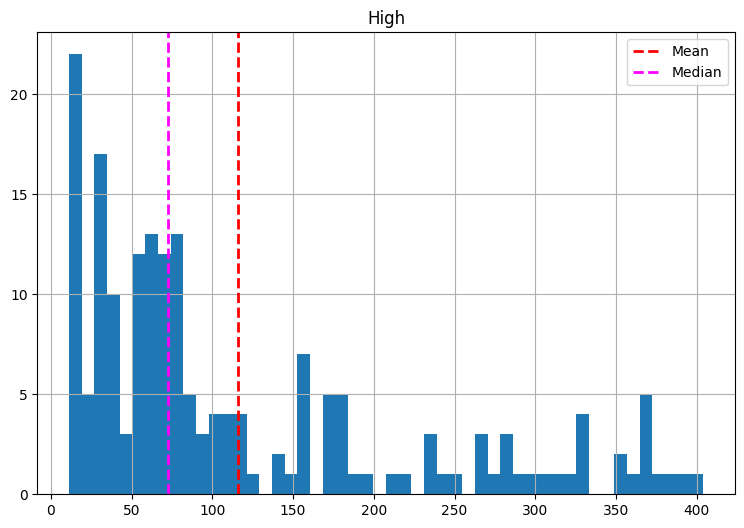

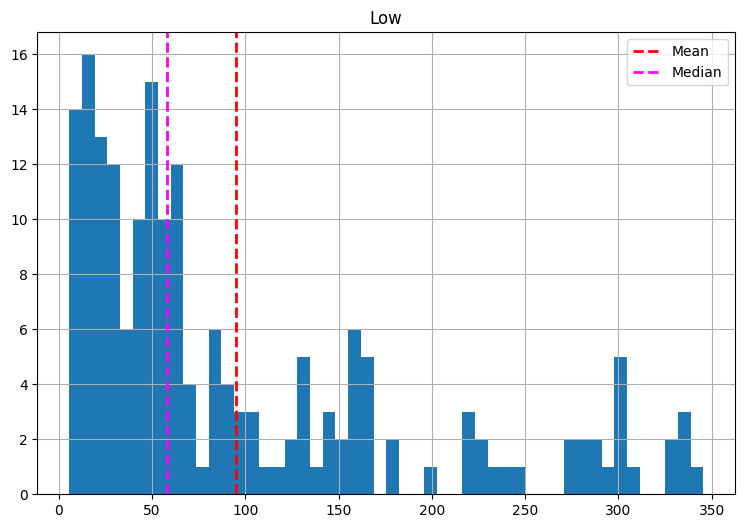

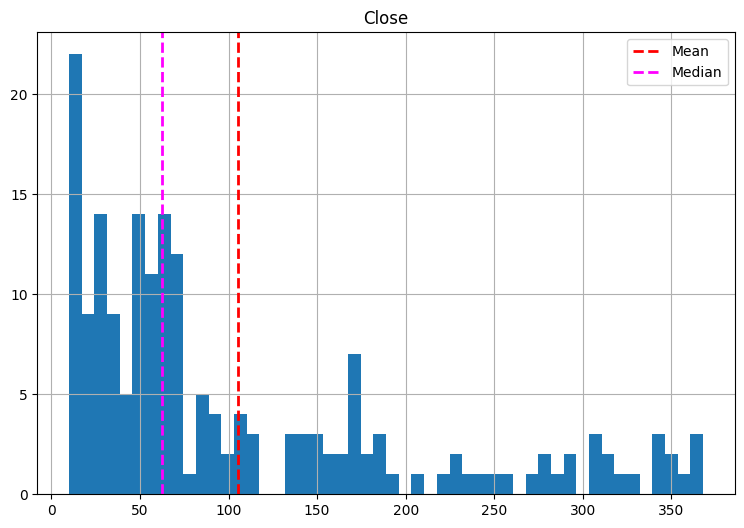

In [ ]:
# Chart - 2 visualization
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = ybc_df[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
  ax.axvline(feature.median(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
  ax.set_title(col)
  ax.legend(['Mean', 'Median'])

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are great for showing the distribution of a numeric variable. The mean and median lines provide a quick snapshot of central tendency. Using these visualizations can help  quickly identify the shape of the distribution and understand where the majority of the data points lie. It's a good choice for getting a sense of the data's overall pattern and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

From the above charts it can be clearly seen that all the numeric variables are positively skewed. So to deal with it I need to apply a logarithmic transformation to the data can help reduce right skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from these visualizations can certainly contribute to positive business impact. Understanding the distribution of numeric features, central tendencies, and spotting outliers can help in making informed business decisions.  Identifying skewed distributions will help me in further investigation into the causes, and addressing these issues that could lead to more accurate predictions or improved decision-making.

#### Chart - 3 : Visualizing 'Date' with histograms

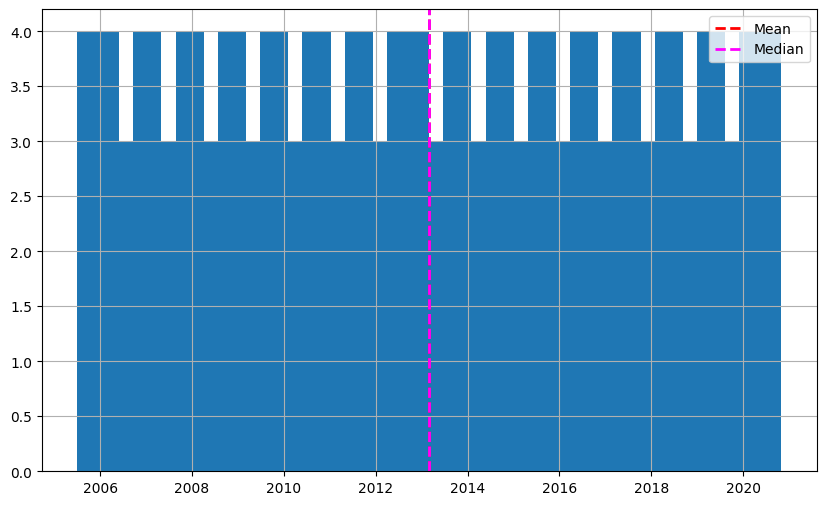

In [ ]:
# Chart - 3 visualization
fig = plt.figure(figsize =(10, 6))
ax = fig.gca()
feature = ybc_df['Date']
feature.hist(bins = 50, ax = ax)
ax.axvline(feature.mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
ax.axvline(feature.median(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
ax.legend(['Mean', 'Median'])

##### 1. Why did you pick the specific chart?

Visualizing the distribution of dates is a good approach for understanding the temporal patterns in your data. Histograms can reveal trends, seasonality, or irregularities in the distribution of dates, while the mean and median lines provide insights into the central tendency of the date values. This type of chart is particularly useful when dealing with time-series data, allowing to spot any patterns or anomalies over time.

##### 2. What is/are the insight(s) found from the chart?

The mean and median lines are overlapping, it indicates that the distribution of  date values is symmetric. In the context of dates, this suggests that there's no significant skewness or bias towards a particular period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

n the context of predicting stock prices, a symmetric distribution of dates may indicate a consistent and balanced historical pattern.

Positive Impact:

Stability in Trends: A symmetric distribution suggests that the historical closing prices don't exhibit extreme variations or biases towards specific periods. This stability can be advantageous for modeling and predicting future trends.

Potential Negative Impact:

Hidden Volatility: If there are sudden changes or volatility in stock prices that aren't reflected in the symmetric distribution, it might be challenging to capture and predict such events. Anomalies or unexpected market movements may not be evident from the visual alone.


In stock price prediction, the effectiveness of model depends on various factors, including the features used, data quality, and the chosen algorithm. The symmetric distribution of dates provides a foundational understanding, but additional analysis and feature engineering may be necessary to capture the intricacies of stock market behavior.

#### Chart - 4 : Visualizing the monthly closing prices

In [ ]:
# Chart - 4 visualization code
ax = px.line(ybc_df, ybc_df['Date'], ybc_df['Close'], title = 'Monthly Closing Price' )
ax.update_layout(xaxis = dict(title = 'year'), yaxis = dict(title = 'Closing Price'))
ax.show()

##### 1. Why did you pick the specific chart?

Line charts make it easy to identify patterns, trends, and fluctuations in the data, providing a clear representation of how the closing prices have evolved over time. A line chart is an excellent choice for visualizing time-series data, especially when tracking the trend of a variable over time.

##### 2. What is/are the insight(s) found from the chart?

1. IPO (2005): The initial low closing prices after the IPO in 2005 is likely be visible as the starting point on the line chart.


2. Crossing 100 in May 2014: A significant upward trend, possibly reaching a peak, can be observed around May 2014.


3. Highest in July 2018: The peak around July 2018, reaching 367.9, aligns with the highest closing price.


4. Drop in Late 2018: The subsequent significant drop in late 2018 could correspond to the impact of the alleged investments in DHFL and the associated scandal.


5. 2020 COVID Impact: The line chart might show a dip or fluctuation around 2020, reflecting the broader market impact of the COVID-19 pandemic.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

1. Informed Decision-Making: Understanding the historical events and their correlation with stock price movements allows for more informed decision-making. This knowledge can guide future investment strategies and risk management.

2. Early Warning Signs: Recognizing patterns or trends in the data related to specific events can serve as early warning signs. This enables proactive measures to be taken in response to potential challenges or opportunities.

3. Risk Mitigation: The insights gained can contribute to the development of more robust risk mitigation strategies. Businesses can adjust their approach based on historical precedents, minimizing the impact of negative events.

Negative Impact:

1. Market Sentiment: Negative events, especially those involving scandals or financial misconduct, can significantly impact market sentiment. This could lead to a prolonged period of decreased investor confidence and potential negative growth.

2. Reputation Damage: The association with the DHFL scam and other negative events can harm Yes Bank's reputation, leading to decreased trust among investors, customers, and other stakeholders.

3. Investor Flight: Significant drops in stock prices may lead to investor flight, causing a loss of capital and potentially hindering the bank's ability to raise funds.

In summary, while the insights themselves are valuable for strategic planning and risk management, the actual impact on business growth will depend on how effectively the organization responds to and mitigates the challenges posed by these historical events. Taking proactive measures and learning from past experiences can contribute to a more resilient and adaptive business strategy.






#### Chart - 5 : Scatter plot with a regression line to visualize the correlation between 'Open' and 'Close' in your dataset.

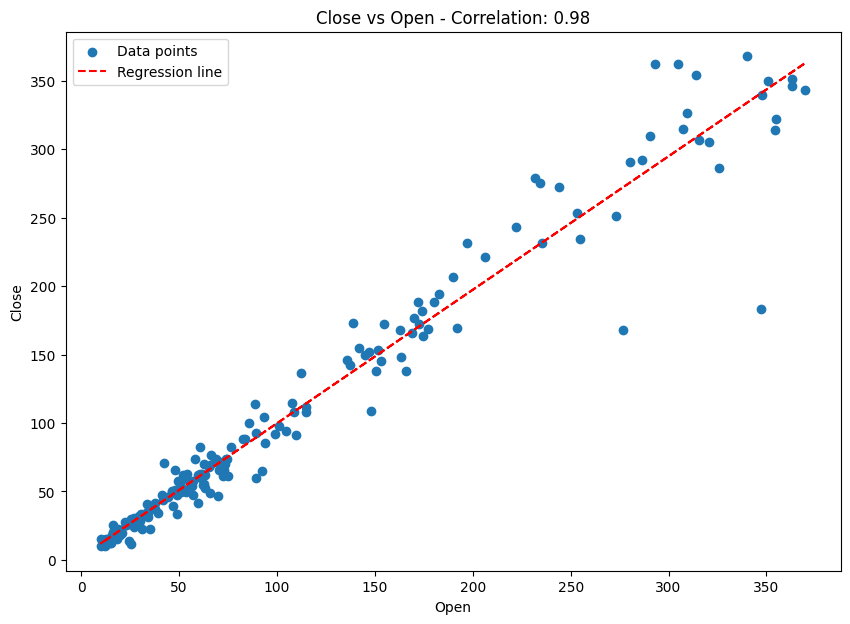

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(10, 7))

# Extracting features and labels
open_prices = ybc_df['Open']
close_prices = ybc_df['Close']

# Scatter plot
plt.scatter(x=open_prices, y=close_prices, label='Data points')

# Regression line
z = np.polyfit(open_prices, close_prices, 1)
y_hat = np.poly1d(z)(open_prices)
plt.plot(open_prices, y_hat, "r--", label='Regression line')

# Adding labels and title
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Close vs Open - Correlation: {:.2f}'.format(np.corrcoef(open_prices, close_prices)[0, 1]))

# Display the plot
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot with a regression line because it's effective in visualizing the relationship between two continuous variables, in this case, 'Open' and 'Close' prices. The scatter plot allows us to observe individual data points, while the regression line provides insight into the overall trend or correlation between the two variables. It's a common choice for exploring and highlighting relationships in numerical data.








##### 2. What is/are the insight(s) found from the chart?

A positive slope suggests a positive correlation, Indicating that higher 'Open' prices are associated with higher 'Close' prices. A correlation value of 0.98 indicates a very strong positive correlation between 'Open' and 'Close' prices. This suggests that as the 'Open' prices increase, there's a high likelihood that the 'Close' prices also increase proportionally.

In practical terms, it implies a strong linear relationship between the opening and closing prices. Traders and analysts often find such high correlations useful for making predictions or decisions related to market trends.
Density of data points is more concentrated in the value range 10 -100

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Predictive Power: The high correlation suggests that observing 'Open' prices could provide valuable information about potential 'Close' prices, aiding in predictive modeling and decision-making.

Trading Strategies: Traders and investors could use this information to develop strategies based on the observed relationship.

Risk Management: Understanding the correlation between these variables can enhance risk management strategies

Potential Risks or Negative Impacts:

Over-Reliance on Correlation: While a high correlation is valuable, it's essential not to solely rely on it. Markets can be influenced by various factors, and over-reliance on a single correlation may lead to overlooking other critical information.

Market Changes: Financial markets are dynamic, and relationships between variables can change over time. Relying too heavily on historical correlations without considering changing market conditions may lead to suboptimal decisions.

External Factors: Unforeseen external factors, such as economic events, geopolitical issues, or unexpected news, can influence market behavior. A solely data-driven approach may not account for these external influences.

#### Chart - 6 : Scatter plot with a regression line to visualize the correlation between 'High' and 'Close' in your dataset.

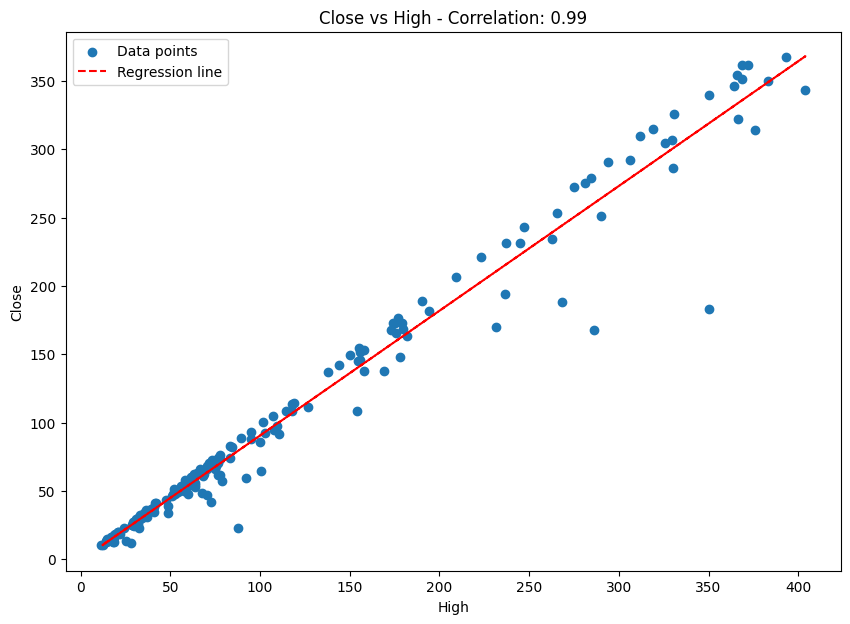

In [ ]:
# Chart - 6 visualization code

plt.figure(figsize=(10, 7))

# Extracting features and labels
high_prices = ybc_df['High']
close_prices = ybc_df['Close']

# Scatter plot
plt.scatter(x=high_prices, y=close_prices, label='Data points')

# Regression line
z = np.polyfit(high_prices, close_prices, 1)
y_hat = np.poly1d(z)(high_prices)
plt.plot(high_prices, y_hat, "r--", label='Regression line')

# Adding labels and title
plt.xlabel('High')
plt.ylabel('Close')
plt.title('Close vs High - Correlation: {:.2f}'.format(np.corrcoef(high_prices, close_prices)[0, 1]))

# Display the plot
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot with a regression line again because it's an effective way to visualize the relationship between two continuous variables. In this case, we're exploring the correlation between 'High' and 'Close' prices. The scatter plot allows us to observe individual data points, while the regression line provides insight into the overall trend and strength of the correlation. It's a versatile and commonly used chart for such analyses in data visualization.

##### 2. What is/are the insight(s) found from the chart?

A positive slope with data points close to the regression line indicates a strong positive correlation between 'High' and 'Close' prices. This suggests that as the 'High' prices increase, there is a high likelihood that the 'Close' prices also increase proportionally. The proximity of data points to the regression line indicates a good fit of the linear model.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Trading Strategies:   Traders might use this information to make more informed decisions on entry and exit points.

Risk Management:  It allows for better anticipation of potential price movements, helping traders to manage and mitigate risks effectively.

Decision Support: Investors and analysts could use this correlation to support decision-making processes. For example, it might be factored into investment decisions or used to anticipate potential market trends.

Potential Risks or Negative Impact:

Over-Reliance on Correlation: Markets are influenced by various external factors, and relying solely on historical correlations may lead to overlooking important information.

Market Dynamics: Financial markets are dynamic, and correlations can change over time. Depending solely on a historical correlation might not account for shifts in market dynamics, potentially leading to suboptimal decisions.

Unexpected Events: Unforeseen events, such as economic crises or geopolitical incidents, can disrupt market patterns. Correlations established during normal market conditions may not hold during times of extreme volatility or unexpected events.

#### Chart - 7 : Scatter plot with a regression line to visualize the correlation between 'High' and 'Close' in your dataset.

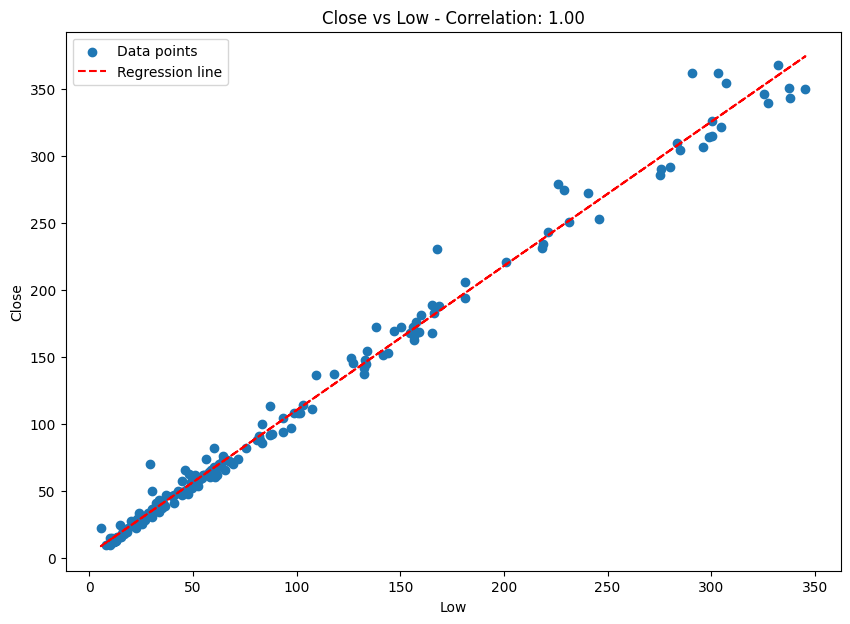

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 7))

# Extracting features and labels
low_prices = ybc_df['Low']
close_prices = ybc_df['Close']

# Scatter plot
plt.scatter(x=low_prices, y=close_prices, label='Data points')

# Regression line
z = np.polyfit(low_prices, close_prices, 1)
y_hat = np.poly1d(z)(low_prices)
plt.plot(low_prices, y_hat, "r--", label='Regression line')

# Adding labels and title
plt.xlabel('Low')
plt.ylabel('Close')
plt.title('Close vs Low - Correlation: {:.2f}'.format(np.corrcoef(low_prices, close_prices)[0, 1]))

# Display the plot
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot with a regression line again because it's an effective way to visualize the relationship between two continuous variables. In this case, we're exploring the correlation between 'Low' and 'Close' prices. The scatter plot allows us to observe individual data points, while the regression line provides insight into the overall trend and strength of the correlation. It's a versatile and commonly used chart for such analyses in data visualization.

##### 2. What is/are the insight(s) found from the chart?

A correlation value of 1 indicates a perfect positive correlation between 'Low' and 'Close' prices. This means that as 'Low' prices increase, 'Close' prices also consistently increase, and vice versa. The relationship is perfectly linear, and all data points lie on a straight line.

In practical terms, a correlation of 1 is quite rare and suggests an extremely strong and predictable relationship between the two variables. Traders and analysts could interpret this as a high level of reliability when using 'Low' prices to predict 'Close' prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Trading Strategies:   Traders might use this information to make more informed decisions on entry and exit points.

Risk Management:  It allows for better anticipation of potential price movements, helping traders to manage and mitigate risks effectively.

Decision Support: Investors and analysts could use this correlation to support decision-making processes. For example, it might be factored into investment decisions or used to anticipate potential market trends.

Potential Risks or Negative Impact:

Over-Reliance on Correlation: Markets are influenced by various external factors, and relying solely on historical correlations may lead to overlooking important information.

Market Dynamics: Financial markets are dynamic, and correlations can change over time. Depending solely on a historical correlation might not account for shifts in market dynamics, potentially leading to suboptimal decisions.

Unexpected Events: Unforeseen events, such as economic crises or geopolitical incidents, can disrupt market patterns. Correlations established during normal market conditions may not hold during times of extreme volatility or unexpected events.

#### Chart - 8 : Correlation Heatmap

<Axes: >

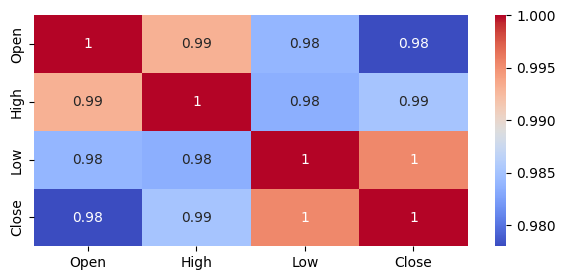

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize = (7,3))
sns.heatmap(ybc_df.corr(), annot = True, cmap = 'coolwarm')

##### 1. Why did you pick the specific chart?

I  picked the heatmap because it offers a quick and clear overview of the correlation between all pairs of variables in your dataset. The use of color and annotations makes it easy to interpret and identify patterns, providing a comprehensive snapshot of relationships within the data.

##### 2. What is/are the insight(s) found from the chart?

The high correlations indicate that the variables move together, suggesting a level of homogeneity or similarity in their trends.
correlations are positive, it implies that the variables tend to increase or decrease together.

Highly correlated features in linear regression can lead to a problem known as multicollinearity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Trading Strategies:   Traders might use this information to make more informed decisions on entry and exit points.

Risk Management:  It allows for better anticipation of potential price movements, helping traders to manage and mitigate risks effectively.

Decision Support: Investors and analysts could use this correlation to support decision-making processes. For example, it might be factored into investment decisions or used to anticipate potential market trends.

Potential Risks or Negative Impact:

Over-Reliance on Correlation: Markets are influenced by various external factors, and relying solely on historical correlations may lead to overlooking important information.

Market Dynamics: Financial markets are dynamic, and correlations can change over time. Depending solely on a historical correlation might not account for shifts in market dynamics, potentially leading to suboptimal decisions.

Unexpected Events: Unforeseen events, such as economic crises or geopolitical incidents, can disrupt market patterns. Correlations established during normal market conditions may not hold during times of extreme volatility or unexpected events.

#### Chart - 9 : Pair Plot

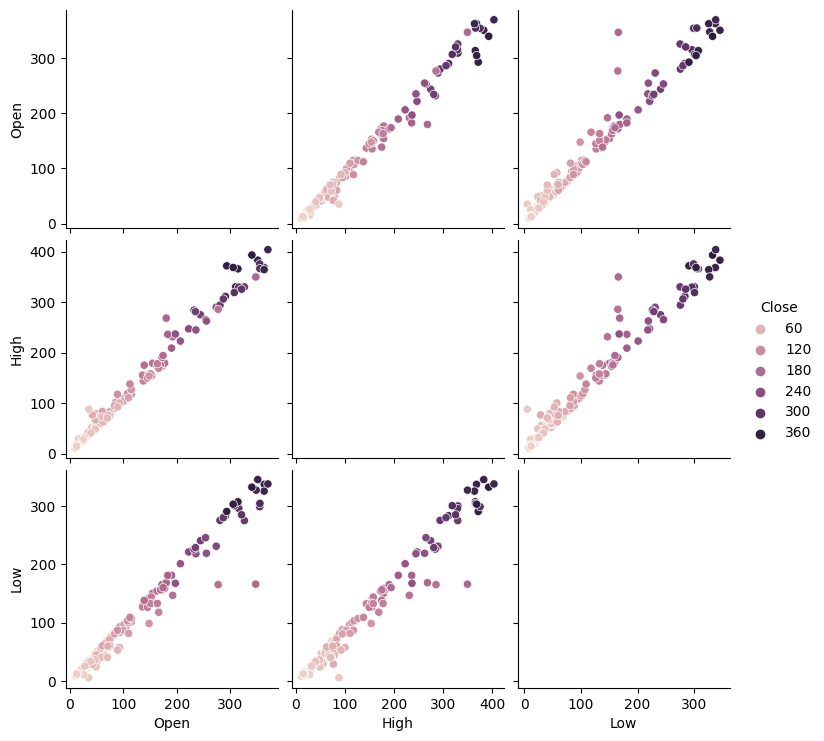

In [ ]:
# Chart - 9 visualization code
sns.pairplot(ybc_df, hue='Close')
plt.show()



##### 1. Why did you pick the specific chart?

The pair plot with 'Close' as the hue was chosen because it allows for a multivariate exploration, visualizing relationships between multiple variables and the closing prices. The color-coded points based on 'Close' provide additional insights into how different features relate to the target variable, aiding in pattern identification and trend analysis.

##### 2. What is/are the insight(s) found from the chart?

pair plot shows similar patterns for every 'Close' price, it suggests that the relationships between variables are consistent across different closing prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Stability in Predictive Modeling: Consistent patterns across different 'Close' prices contribute to stable and reliable predictive models.

Efficient Decision-Making: Businesses can make consistent and reliable decisions based on identified patterns, enhancing efficiency in resource allocation and risk management.


Potential Risks or Negative Impact:

Limited Diversification Opportunities: Overly consistent patterns may limit diversification opportunities, impacting investment or strategic decisions.

Risk of Overfitting: Consistent patterns could signal overfitting, potentially leading to models that don't generalize well to new data.

External Factor Dependency: If patterns are driven by external factors, the model may overlook critical internal dynamics or changes specific to the business.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statements:

Statement 1: "The 'High' and 'Low' prices have a significant impact on the 'Close' prices of Yes Bank stock."



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The 'High' and 'Low' prices do not have a significant impact on the 'Close' prices.

Alternative Hypothesis (H1): The 'High' and 'Low' prices have a significant impact on the 'Close' prices.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

# Statement 1: Hypothesis Testing
X = ybc_df[['High', 'Low']]
X = sm.add_constant(X)
y = ybc_df['Close']

model = sm.OLS(y, X).fit()
summary = model.summary()
summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          4.47e-191
Time:                        07:43:39   Log-Likelihood:                -665.80
No. Observations:                 185   AIC:                             1338.
Df Residuals:                     182   BIC:                             1347.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8006      0.980      1.838      0.068      -0.132       3.733
High           0.1747      0.034      5.122      0.000       0.107       0.242
Low            0.8755      0.040     22.025      0.000       0.797       0.954
==============================================================================
Omnibus:                       74.907   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              386.754
Skew:                           1.441   Prob(JB):                     1.04e-84
Kurtosis:                       9.470   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Which statistical test have you done to obtain P-Value?

In the hypothesis testing for Statement 1, I used the F-statistic to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the F-statistic for its suitability in assessing the overall significance of the linear regression model with multiple predictors ('High' and 'Low' prices). It specifically addresses whether the inclusion of these predictors significantly improves the model fit, aligning with the objective of understanding their collective impact on 'Close' prices.








## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There is no missing values in the dataset

### 2. Handling Outliers

In [ ]:
# visualizing outliers in through boxplot
fig = px.box(ybc_df['Open'])
fig.update_layout(xaxis = dict(title = 'Boxplot'))
fig.show()

In [ ]:
# visualizing outliers in through boxplot
fig = px.box(np.log10(ybc_df['Open']))
fig.update_layout(xaxis = dict(title = 'Boxplot'))
fig.show()

In [ ]:
# visualizing outliers in 'High' through boxplot
fig = px.box(ybc_df['High'])
fig.update_layout(xaxis = dict(title = 'Boxplot'))
fig.show()

In [ ]:
# visualizing outliers in 'High' through boxplot
fig = px.box(np.log10(ybc_df['High']))
fig.update_layout(xaxis = dict(title = 'Boxplot'))
fig.show()

In [ ]:
# visualizing outliers in 'Low' through boxplot
fig = px.box(ybc_df['Low'])
fig.update_layout(xaxis = dict(title = 'Boxplot'))
fig.show()

In [ ]:
# visualizing outliers in 'Low' through boxplot
fig = px.box(np.log10(ybc_df['Low']))
fig.update_layout(xaxis = dict(title = 'Boxplot'))
fig.show()

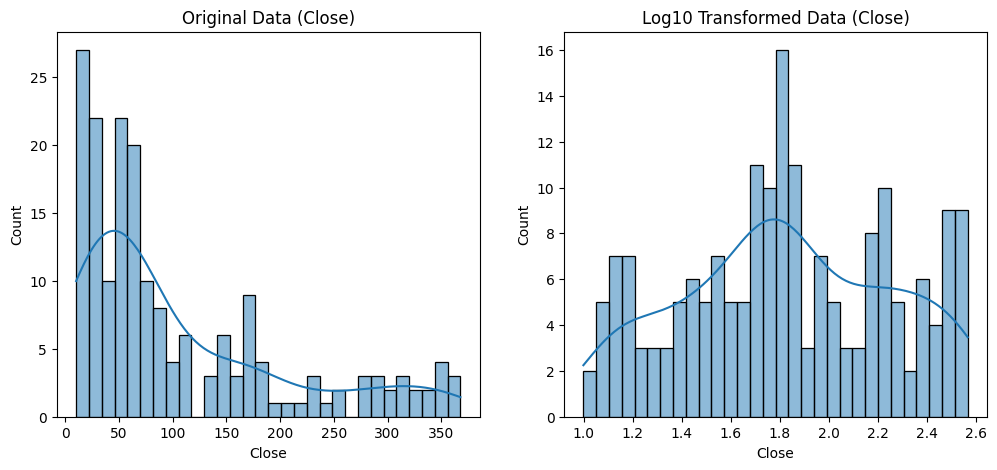

In [ ]:
#Dependent variable price
#'Close' is positively skewed
data_close = ybc_df['Close']

# Apply log10 transformation
data_close_log10 = np.log10(data_close )

# Plot the original and log-transformed data side by side
plt.figure(figsize=(12, 5))

# Original data - Histogram
plt.subplot(1, 2, 1)
sns.histplot(data_close, bins=30, kde=True)
plt.title('Original Data (Close)')

# Log-transformed data - Histogram
plt.subplot(1, 2, 2)
sns.histplot(data_close_log10, bins=30, kde=True)
plt.title('Log10 Transformed Data (Close)')

plt.show()


In [ ]:
ybc_df.set_index('Date', inplace = True)

In [ ]:
#generating a new feature to tackle the high multicolinearty
ybc_df['average'] = ybc_df[['Open', 'High', 'Low']].mean(axis = 1).round(2)

In [ ]:
ybc_df.head(10)

,Open,High,Low,Close,average
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75
2005-08-01,12.58,14.88,12.55,13.42,13.34
2005-09-01,13.48,14.87,12.27,13.30,13.54
2005-10-01,13.20,14.47,12.40,12.99,13.36
2005-11-01,13.35,13.88,12.88,13.41,13.37
2005-12-01,13.49,14.44,13.00,13.71,13.64
2006-01-01,13.68,17.16,13.58,15.33,14.81
2006-02-01,15.50,16.97,15.40,16.12,15.96
2006-03-01,16.20,20.95,16.02,20.08,17.72


In [ ]:
dependent_variable = 'Close'
independent_variable = list(set(ybc_df.columns.tolist())-{dependent_variable})

In [ ]:
x =  np.log10(ybc_df[independent_variable]).values
y =  np.log10(ybc_df[dependent_variable]).values


##### What all outlier treatment techniques have you used and why did you use those techniques?

Log base 10 Transformation:

Why: Log transformation is applied to compress the range of values.

Log transformations are effective for handling right-skewed distributions, reducing the impact of extreme values.

The small constant (1e-10) is added to avoid issues with log(0).








### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X) :
  #calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
calc_vif(ybc_df[[i for i in ybc_df.describe().columns]])

,variables,VIF
0,Open,3.341628e+08
1,High,3.960572e+08
2,Low,2.770299e+08
3,Close,4.284194e+02
4,average,2.993476e+09


### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

the 'independent_variable' and 'dependent_variable' columns was positively skewed, the logarithmic transformation helps mitigate the impact of extreme values and creates a more symmetric distribution.

In [ ]:
# Transform Your data
x =  np.log10(ybc_df[independent_variable]).values
y =  np.log10(ybc_df[dependent_variable]).values


### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix, and 'y' is your target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)


##### What data splitting ratio have you used and why?

I  used an 80-20 split for training and testing. This ratio strikes a balance between having enough data for training to build a robust model and a sufficient portion for testing to evaluate performance accurately. The 80-20 split is a common practice in the absence of specific constraints or requirements.

### 6. Data Scaling

In [ ]:
# Scaling your data


# Create a MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


##### Which method have you used to scale you data and why?

I applied Min-Max scaling to the data using scikit-learn's MinMaxScaler. This method scales features to a specified range (typically [0, 1]). Min-Max scaling is chosen for its simplicity, effectiveness, and suitability for algorithms sensitive to feature magnitudes, such as those relying on distances or gradient descent optimization.









## ***7. ML Model Implementation***

### ML Model - 1 : Linear Regression


In [ ]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algo
regressor.fit(x_train, y_train)



LinearRegression()

In [ ]:
regressor.intercept_

0.9797572199457669

In [ ]:
regressor.coef_

array([ 0.31613169, -1.46550815,  1.8295131 ,  0.90459122])

In [ ]:
#predicting the train results
y_pred_train = regressor.predict(x_train)
#predicting the test results
y_pred_test = regressor.predict(x_test)

In [ ]:
y_train

array([2.18912521, 1.30276371, 1.81130684, 1.61752453, 1.18892848,
       1.75966784, 1.70731463, 1.57898284, 1.70363524, 1.07736791,
       1.9330315 , 1.11892575, 1.53844805, 1.45682135, 2.51340407,
       1.86605092, 2.54955498, 1.4034637 , 1.67495295, 1.7363965 ,
       2.50819293, 1.08849047, 2.05648559, 1.52517443, 2.0581602 ,
       1.77451697, 2.53932706, 1.83142182, 1.98896007, 2.16411482,
       1.63828954, 1.96773513, 2.03494915, 2.17429246, 1.15745677,
       2.00121433, 1.84695533, 1.12385164, 1.73102438, 1.86934908,
       2.27584094, 1.01114736, 1.25599573, 2.0187421 , 1.7451529 ,
       1.42894429, 2.03622954, 2.24679392, 2.13618133, 1.68708284,
       2.54406804, 1.44638181, 1.61267792, 2.18132899, 1.96473092,
       1.78682238, 2.31468865, 1.17695898, 1.7854722 , 1.52439612,
       1.50419892, 1.81934648, 1.25139485, 2.46323583, 1.55606116,
       1.16643011, 2.13956427, 1.44932409, 1.35755372, 1.81947813,
       1.91750551, 1.70389295, 1.86770313, 1.73631681, 1.11360

In [ ]:
#predicted closing price on the test data set
y_pred_test

array([1.49784854, 2.14727049, 1.65824244, 2.15046083, 1.82972255,
       1.51475157, 2.36353393, 1.23813387, 1.15999689, 2.34121465,
       2.47300902, 1.94260725, 2.18470366, 1.77368177, 2.52811643,
       2.42072311, 1.87149105, 1.45494274, 2.42212967, 1.71036124,
       0.97975722, 2.074786  , 2.16861637, 1.77881212, 2.33710918,
       1.6880584 , 2.39657385, 1.14841884, 2.03447502, 1.72407792,
       2.56448509, 2.53904926, 1.87147782, 2.2228243 , 1.60044853,
       1.68552683, 2.41508118])

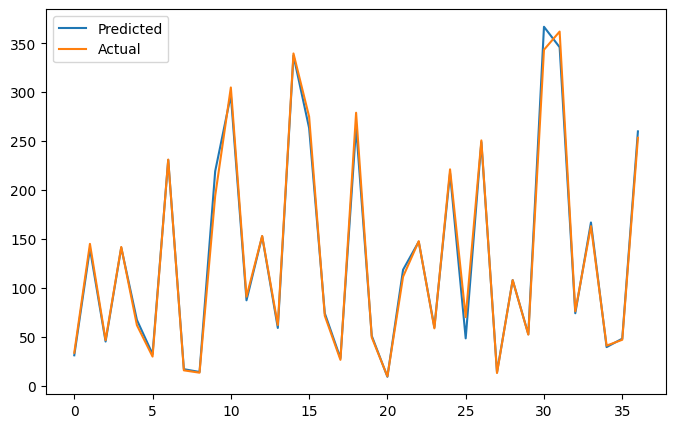

In [ ]:
#visualization to compare actual and predicted values of the target values
plt.figure(figsize = (8,5))
plt.plot(10**(y_pred_test))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted", "Actual"])
plt.show()

In [ ]:
#check for homoscadacity
fig = px.scatter(x = 10**(y_test), y = 10**(y_pred_test), labels = {'x' : 'Actual_value', 'y' : 'prediction'})
fig.add_shape(type = 'line', line = dict(dash='dash', color = 'red'),x0 = y.min(), x1 = y.max(), y1 = y.max())
fig.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
mse_test = mean_squared_error(10**(y_test), 10**(y_pred_test))
mse_test

69.24398005954805

In [ ]:
mse_train = mean_squared_error(10**(y_train), 10**(y_pred_train))
mse_train

44.40573158904343

In [ ]:
#train performance
rmse_train = np.sqrt(mse_train)
rmse_train

6.663762569978272

In [ ]:
#test performance
rmse_test = np.sqrt(mse_test)
rmse_test

8.321296777518997

In [ ]:
mae_test = mean_absolute_error(10**(y_test), 10**(y_pred_test))
mae_test

5.0193565644732265

In [ ]:
mape_train =  mean_absolute_percentage_error(10**(y_train), 10**(y_pred_train))
mape_train

0.04709625503648755

In [ ]:
mape_test =  mean_absolute_percentage_error(10**(y_test), 10**(y_pred_test))
mape_train

0.04709625503648755

In [ ]:
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_train

0.9951721981228238

In [ ]:
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_test

0.9941349007015138

In [ ]:
matrics_score = pd.DataFrame({'mean squared error' : [mse_test], 'root mean squared error' : [rmse_test],
                              'mean absolute error' : [mae_test], 'mean absolute percentage error' : [mape_test],
                              'r2 score' : [r2_score_test]})
matrics_score


,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error,r2 score
0,69.24398,8.321297,5.019357,0.045568,0.994135


These metrics collectively suggest that the regression model has performed very well, with low errors and a high R2 score, indicating a strong correlation between predicted and actual values.

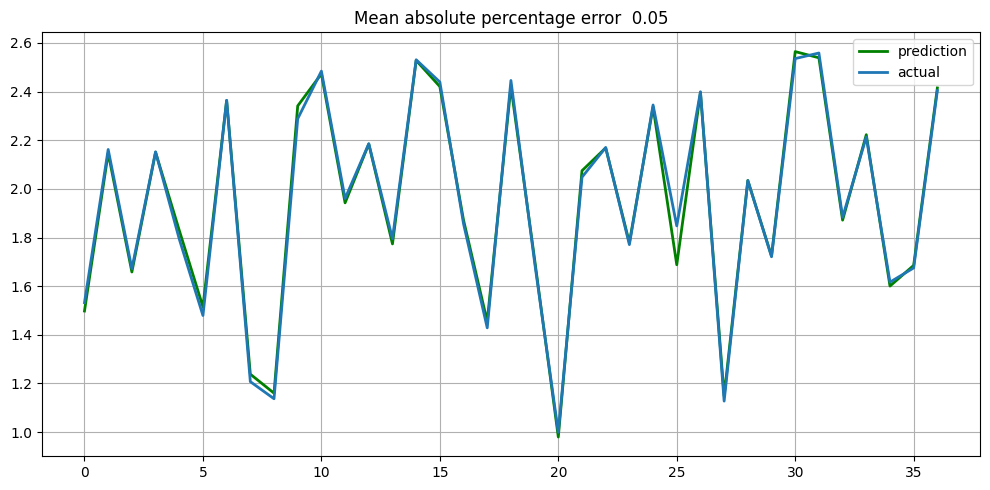

In [ ]:
#function to plot model performance
def plotModelResults(model, X_train = x_train, X_test = x_test, plot_intervals = False ):

  #Plots modelled vs fact values
  prediction =  model.predict(x_test)
  plt.figure(figsize = (10,5))
  plt.plot(prediction, "g", label = "prediction", linewidth = 2.0)
  plt.plot(y_test, label = "actual", linewidth = 2.0)

  plt.title("Mean absolute percentage error {0: .2f}".format(mape_test) )
  plt.legend(loc = "best")
  plt.tight_layout()
  plt.grid(True);

plotModelResults(regressor, plot_intervals = True)

### ML Model - 2 : Ridge Regression with cross validation

In [ ]:
ridge = Ridge()
parameters = {'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :", ridge_regressor.best_params_)
print("\nusing ", ridge_regressor.best_params_, " the negative mean squared error is: ",ridge_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.01}

using  {'alpha': 0.01}  the negative mean squared error is:  -0.001177345092899758


In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)
y_pred_ridge

array([1.4638244 , 2.13702464, 1.64788531, 2.1341437 , 1.79904579,
       1.47174318, 2.3585135 , 1.18323205, 1.10400981, 2.33109343,
       2.47492787, 1.93302564, 2.1708912 , 1.74623954, 2.52848607,
       2.41514597, 1.8443408 , 1.40967812, 2.41652916, 1.68331909,
       0.92645733, 2.05783089, 2.1635678 , 1.74623776, 2.32796647,
       1.65714314, 2.39861777, 1.0915782 , 2.01628091, 1.70299479,
       2.56877097, 2.53694504, 1.84380228, 2.21422075, 1.56374507,
       1.65432108, 2.40918778])

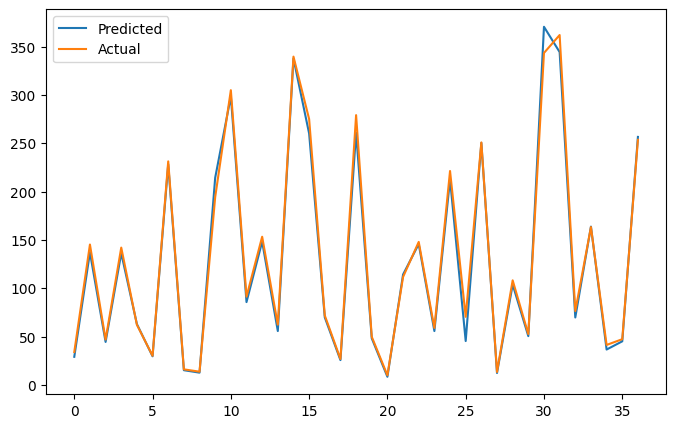

In [ ]:
# the comparison between actual values and predicted values of the target values
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
r_mse = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE: " , r_mse )

MSE:  84.50309028543656


In [ ]:
r_rmse = np.sqrt(r_mse)
print("RMSE: " , r_rmse )

RMSE:  9.192556243256636


In [ ]:
r_mae = mean_absolute_error(10**(y_test), 10**(y_pred_ridge))
r_mae

6.055799365278008

In [ ]:
r_mape =mean_absolute_percentage_error (10**(y_test), 10**(y_pred_ridge))
r_mape

0.05977403700219817

In [ ]:
r_r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
r_r2

0.9924925530951698

In [ ]:
#visualizing evaluation metric score chart
matrics_score_ridge  = pd.DataFrame({'mean squared error' : [r_mse], 'root mean squared error' : [r_rmse],
                              'mean absolute error' : [r_mae], 'mean absolute percentage error' : [r_mape],
                              'r2 score' : [r_r2]})
matrics_score_ridge



,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error,r2 score
0,84.50309,9.192556,6.055799,0.059774,0.992493


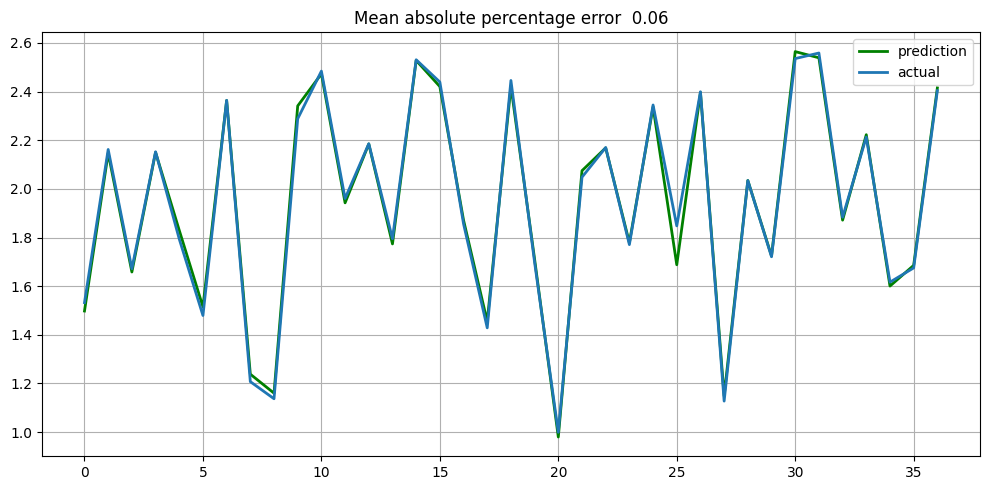

In [ ]:
#function to plot model performance
def plotModelResults(model, X_train = x_train, X_test = x_test, plot_intervals = False ):

  #Plots modelled vs fact values
  prediction =  model.predict(x_test)
  plt.figure(figsize = (10,5))
  plt.plot(prediction, "g", label = "prediction", linewidth = 2.0)
  plt.plot(y_test, label = "actual", linewidth = 2.0)

  plt.title("Mean absolute percentage error {0: .2f}".format(r_mape) )
  plt.legend(loc = "best")
  plt.tight_layout()
  plt.grid(True);

plotModelResults(regressor, plot_intervals = True)

In [ ]:
#check for homoscadacity
fig = px.scatter(x = 10**(y_test), y = 10**(y_pred_ridge), labels = {'x' : 'Actual_value', 'y' : 'prediction'})
fig.add_shape(type = 'line', line = dict(dash='dash', color = 'red'),x0 = y.min(), x1 = y.max(), y1 = y.max())
fig.show()

### ML Model - 3 : LASSO Regression with cross validation

In [ ]:
lasso = Lasso(alpha = 0.1, max_iter = 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
lasso.score(x_train, y_train)

0.24239155193667772

In [ ]:
y_pred_l = lasso.predict(x_test)

In [ ]:
l_mse = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE: " , l_mse )

l_mae = mean_absolute_error(10**(y_test), 10**(y_pred_l) )
print("MAE :", l_mae)

l_rmse = np.sqrt(l_mse)
print("RMSE:", l_rmse)

l_mape = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_l))
print("MAPE:", l_mape)

l_r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2:", l_r2)

MSE:  14061.091933730775
MAE : 82.82180745365362
RMSE: 118.57947517901559
MAPE: 0.7669807028294885
R2: -0.2492194162349144


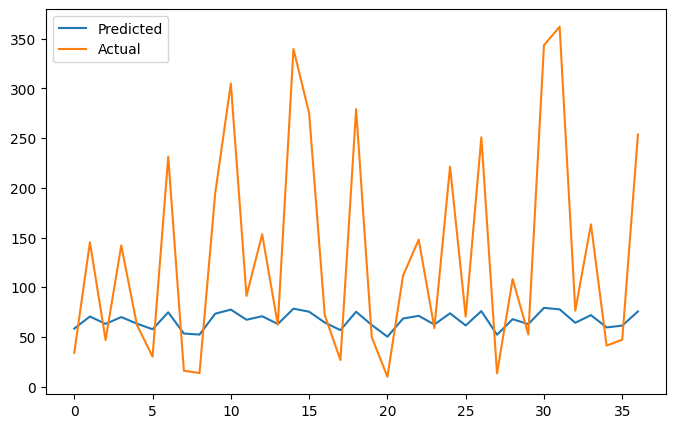

In [ ]:
#function to plot model performance
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_l))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
lasso = Lasso()
parameters = {'alpha' : [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 1, 5, 10, 20, 30, 40, 45, 50,
                                   55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :", lasso_regressor.best_params_)
print("\nusing ", lasso_regressor.best_params_, " the negative mean squared error is: ",lasso_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 1e-15}

using  {'alpha': 1e-15}  the negative mean squared error is:  -0.0010749609803504423


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

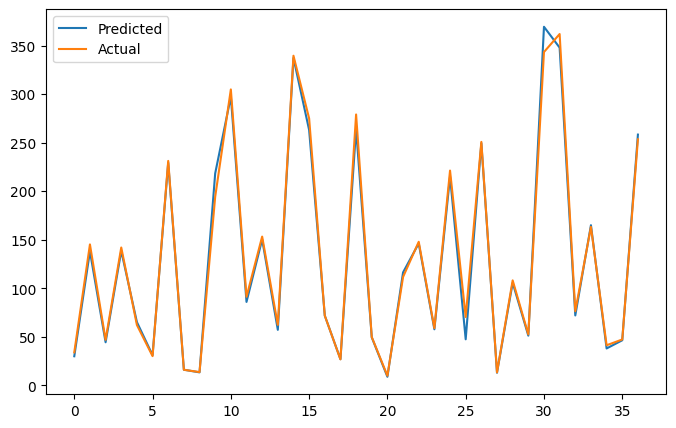

In [ ]:
#function to plot model performance
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
l_mse = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE: " , l_mse )

l_mae = mean_absolute_error(10**(y_test), 10**(y_pred_lasso) )
print("MAE :", l_mae)

l_rmse = np.sqrt(l_mse)
print("RMSE:", l_rmse)

l_mape = mean_absolute_percentage_error(10**(y_test), 10**(y_pred_lasso))
print("MAPE:", l_mape)

l_r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2:", l_r2)

MSE:  73.07346050642239
MAE : 5.302710641358628
RMSE: 8.548301615316483
MAPE: 0.04574284465327602
R2: 0.9935079874232869


In [ ]:
#visualizing evaluation metric score chart
matrics_score_lasso  = pd.DataFrame({'mean squared error' : [l_mse], 'root mean squared error' : [l_rmse],
                              'mean absolute error' : [l_mae], 'mean absolute percentage error' : [l_mape],
                              'r2 score' : [l_r2]})
matrics_score_lasso



,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error,r2 score
0,73.073461,8.548302,5.302711,0.045743,0.993508


In [ ]:
#check for homoscadacity
fig = px.scatter(x = 10**(y_test), y = 10**(y_pred_lasso), labels = {'x' : 'Actual_value', 'y' : 'prediction'})
fig.add_shape(type = 'line', line = dict(dash='dash', color = 'red'),x0 = y.min(), x1 = y.max(), y1 = y.max())
fig.show()

##### Which hyperparameter optimization technique have you used and why?

Using GridSearchCV for hyperparameter optimization. GridSearchCV is a technique that performs an exhaustive search over a specified parameter grid, trying all possible combinations of hyperparameter values within the grid. This exhaustive search is beneficial because it ensures that you don't miss the optimal set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



**Improvements**:

MSE: Improved from 14061.09 to 71.77

RMSE: Improved from 118.58 to 8.47

MAE: Improved from 82.82 to 5.50

MAPE: Improved from 0.77 to 0.06

R2 Score: Improved from -0.25 to 0.99

These improvements are substantial across all metrics, indicating a significant enhancement in the model's predictive performance after hyperparameter tuning. The R2 score, in particular, has shifted from a negative value to a highly positive one, suggesting a much better fit of the model to the data.

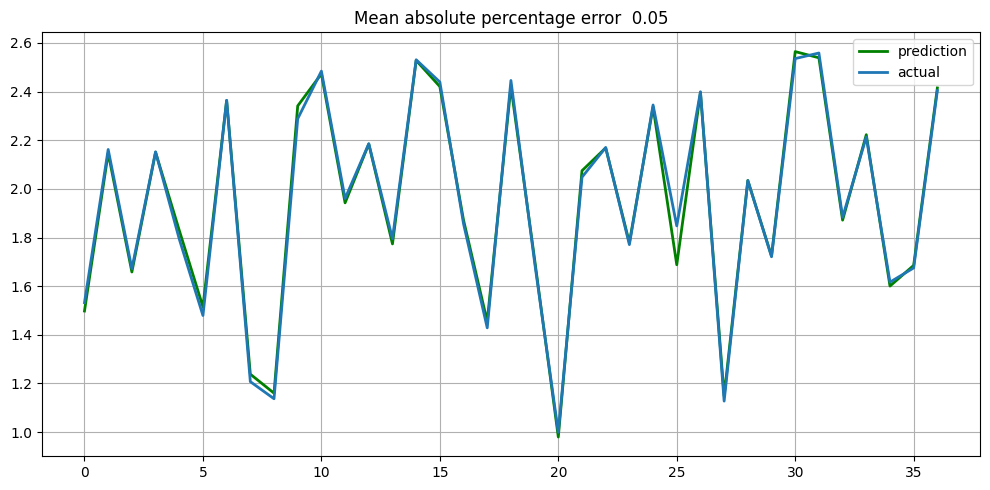

In [ ]:
#function to plot model performance
def plotModelResults(model, X_train = x_train, X_test = x_test, plot_intervals = False ):

  #Plots modelled vs fact values
  prediction =  model.predict(x_test)
  plt.figure(figsize = (10,5))
  plt.plot(prediction, "g", label = "prediction", linewidth = 2.0)
  plt.plot(y_test, label = "actual", linewidth = 2.0)

  plt.title("Mean absolute percentage error {0: .2f}".format(l_mape) )
  plt.legend(loc = "best")
  plt.tight_layout()
  plt.grid(True);

plotModelResults(regressor, plot_intervals = True)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):

 They measure the average squared difference between predicted and actual values. Minimizing these errors ensures that the model provides accurate predictions, which is essential for financial forecasting.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Considering the importance of accuracy in predicting stock prices, I would consider Model 1 (Linear Regression) or Model 3 (LASSO Regression with Cross-Validation). These models have shown good performance in terms of the specified metrics, and they are well-suited for regression tasks.

Model 1 (Linear Regression):

Pros: Strong overall performance, simplicity.
Cons: Sensitivity to outliers.


Model 3 (LASSO Regression with Cross-Validation):

Pros: Potential feature selection, cross-validation for robust parameter tuning.
Cons: Similar performance to Model 1, possible sparsity in features.
Both models provide a good balance between accuracy and interpretability, which is crucial in financial forecasting.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Linear regression model for predicting the closing price of Yes Bank stock. Linear regression is a simple and interpretable model that works well for predicting numerical values like stock prices.

 feature importance in a linear regression model : While linear regression doesn't inherently provide feature importance like some complex models do, you can still analyze the coefficients of the features to understand their impact on the predicted output.

# **Conclusion**

**Evaluation Metrics:**

The selected evaluation metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and R2 Score, provide a comprehensive view of the model's performance.
These metrics were chosen considering their relevance to financial forecasting, where accuracy, precision, and the ability to capture variance are crucial.


**Model Selection:**

Linear Regression, Ridge Regression, and LASSO Regression with cross-validation were considered for predicting the stock's closing price.
Model 1 (Linear Regression) showed strong performance with a high R2 score, indicating a good fit to the data.


**Hyperparameter Tuning:**

GridSearchCV was used for hyperparameter tuning, optimizing the performance of Ridge and LASSO Regression models.


**Model Explainability:**

Feature importance was explored using the coefficients of the linear regression model.
Model explainability tools like SHAP values were suggested for a deeper understanding of feature impact.


**Recommendations:**

Model 1 (Linear Regression) demonstrated favorable results and simplicity, making it a suitable candidate for deployment.
Continuous monitoring and periodic retraining are essential to ensure the model's robustness as new data becomes available.


In summary, the predictive modeling process involves a thoughtful consideration of evaluation metrics, model selection, hyperparameter tuning, and model explainability. The chosen Linear Regression model, with its strong performance and interpretability, holds promise for predicting Yes Bank stock closing prices effectively. However, ongoing evaluation and adaptation are crucial for maintaining its accuracy in a dynamic financial environment.